Travelling salesman problem

Developer: Tanmoy Das
Date: July 10, 2024

# Model Formulation and Pyomo implementation

In [1]:
# Example Usage
from tsp_model import TravelingSalesmanProblem
num_cities = 20
tsp = TravelingSalesmanProblem(num_cities)
distance_matrix = tsp.generate_distance_matrix()
model = tsp.create_model()
route = tsp.solve()
tsp.print_route(route)

result.Solver.status result.Solver.status=<SolverStatus.ok: 'ok'>
Optimal Route:
City 1 -> City 17
City 2 -> City 14
City 3 -> City 15
City 4 -> City 1
City 5 -> City 6
City 6 -> City 12
City 7 -> City 13
City 8 -> City 16
City 9 -> City 18
City 10 -> City 5
City 11 -> City 7
City 12 -> City 8
City 13 -> City 3
City 14 -> City 10
City 15 -> City 2
City 16 -> City 9
City 17 -> City 20
City 18 -> City 19
City 19 -> City 4
City 20 -> City 11


In [2]:
# model.pprint()
# model.constraint.pprint()

# Draw Network

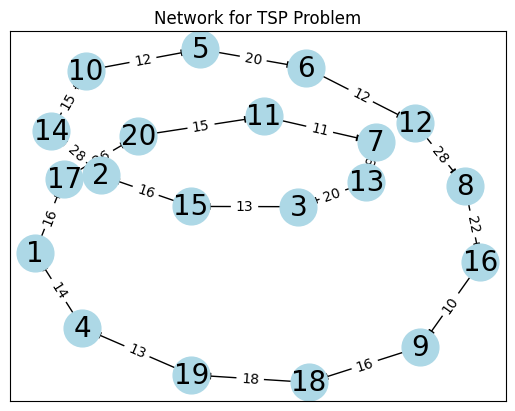

' The figure might have weird shape since we directly considered distance between cities, \nrather than coordinates and then calculate distance '

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes
for i in range(1, num_cities):
    G.add_node(i)

# Add edges with weights
for r in route:
    #print(route)
    #print(r[0], r[1])
    G.add_edge(r[0], r[1], weight=distance_matrix[r[0]-1, r[1]-1])
    #G.add_edge(r[0], r[1], weight=distance_matrix[r[0], r[1]])

# Get positions for all nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw the edges
for r in route:
    edges = [(r[i], r[i + 1]) for i in range(len(r) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black', arrows=True)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Draw edge labels
edge_labels = {(r[0], r[1]): distance_matrix[r[0]-1, r[1]-1] for r in route}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Network for TSP Problem")
plt.show()
""" The figure might have weird shape since we directly considered distance between cities, 
rather than coordinates and then calculate distance """

In [4]:
# distance_matrix#[1,10]

# Call Custom Genetic Algorithm for TSP

In [5]:
from genetic_algorithm_tsp import GeneticAlgorithmTSP 
import numpy as np
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# Parameters for the GA
pop_size = 100
num_generations = 500
mutation_rate = 0.01

# data 
num_cities = 10
# Generate a random distance matrix for the GA
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance from a city to itself is 0

# Solve TSP using the Genetic Algorithm
ga_tsp_solver = GeneticAlgorithmTSP(distance_matrix, pop_size, num_generations, mutation_rate)
best_path, best_distance = ga_tsp_solver.evolve_population()

print("\nBest Path:", best_path)
print("Best Distance:", best_distance)


Best Path: [8, 4, 5, 9, 0, 7, 6, 2, 1, 3]
Best Distance: 356


# Compare default GLPK solver vs Genetic Algorithm 